In [1]:
# import libraries

In [2]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [3]:
# Load the data and explore


In [4]:
raw_data = loadarff('BreastCancerAll.reduced.using.cfs.missing.arff')
df = pd.DataFrame(raw_data[0])


In [5]:
#dfr.describe()


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 60 columns):
302_chrom1_reg44816452-46047207_probnorm        157 non-null float64
1195_chrom2_reg15573647-20346474_probgain       157 non-null float64
1441_chrom2_reg126478953-126745976_probloss     157 non-null float64
1471_chrom2_reg131945577-132042781_probgain     157 non-null float64
1673_chrom3_reg12735694-14873985_probloss       157 non-null float64
1966_chrom3_reg128485208-128664764_probnorm     157 non-null float64
1975_chrom3_reg130189196-130206126_probgain     157 non-null float64
2007_chrom3_reg143686906-144718154_probgain     157 non-null float64
2019_chrom3_reg156981865-159692979_probgain     157 non-null float64
2054_chrom3_reg166639991-168786545_probnorm     157 non-null float64
2139_chrom3_reg196908262-196937230_probgain     157 non-null float64
2170_chrom4_reg833085-843614_probnorm           156 non-null float64
2630_chrom4_reg187735989-188875290_probnorm     156 non-null float6

In [7]:
# there are 59 variables in the dataset and 157 observations

In [8]:
#Do the data need cleaning?
#are there any missing values?

In [9]:
df.isnull().sum()


302_chrom1_reg44816452-46047207_probnorm        0
1195_chrom2_reg15573647-20346474_probgain       0
1441_chrom2_reg126478953-126745976_probloss     0
1471_chrom2_reg131945577-132042781_probgain     0
1673_chrom3_reg12735694-14873985_probloss       0
1966_chrom3_reg128485208-128664764_probnorm     0
1975_chrom3_reg130189196-130206126_probgain     0
2007_chrom3_reg143686906-144718154_probgain     0
2019_chrom3_reg156981865-159692979_probgain     0
2054_chrom3_reg166639991-168786545_probnorm     0
2139_chrom3_reg196908262-196937230_probgain     0
2170_chrom4_reg833085-843614_probnorm           1
2630_chrom4_reg187735989-188875290_probnorm     1
3150_chrom6_reg1292057-1353261_probnorm         0
3211_chrom6_reg18550170-18661357_probgain       0
3401_chrom6_reg62843325-63283741_probloss       0
3435_chrom6_reg69133049-69809498_probgain       0
3593_chrom6_reg110630205-111025278_probloss     0
3659_chrom6_reg128962975-130409779_probgain     0
4322_chrom8_reg184617-320897_probnorm           0


In [10]:
#this shows the list  of all variables and tells if there are missing values. 
#There are two variables that have 1 missing value each. Those we will drop from our data:


In [11]:
print ("Size and dimentions of dataset before cleaning: ", df.size, df.shape)


Size and dimentions of dataset before cleaning:  9420 (157, 60)


In [12]:
#Size of dataset before cleaning:  9420


In [13]:
df[['2170_chrom4_reg833085-843614_probnorm','2630_chrom4_reg187735989-188875290_probnorm']] = df[['2170_chrom4_reg833085-843614_probnorm','2630_chrom4_reg187735989-188875290_probnorm']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print ("Size and dimentions of dataset after cleaning: ", df.size, df.shape)


Size and dimentions of dataset after cleaning:  9300 (155, 60)


In [14]:
#Size of dataset after cleaning:  9300

In [15]:
# The cancer labels are categorical data. They need to be transformed in integers with a label encoder so that pythons models can understand them


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df['class'] = labelencoder_Y.fit_transform(df['class'])
Y = df['class']
Y = Y.values

In [17]:
# how many of each cancer class is in our data:

In [18]:
print (df['class'].value_counts())

2    53
1    53
0    49
Name: class, dtype: int64


Text(0.5, 1.0, 'Distribution of Cancer Types')

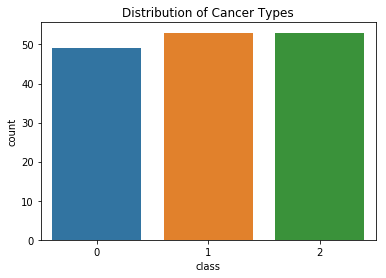

In [19]:
# let's plot it
plt.figure()
sns.countplot(df['class'])
plt.title('Distribution of Cancer Types')


In [20]:
#gives:
#b'HER2+' 0 :  49
#b'HR+'   1 :  53
#b'TN'    2 :  53
#Name: class, dtype: int64
# so the 3 cancer types are well distributed withing our data

In [21]:
# Divide the data into the (assumed) independent variables X and the dependent Y (Y is named already a few lines above)

In [22]:
X = df.iloc[:, 0:58].values

In [23]:
# We will test now some multi-class supervised machine learning classification methods to see which one performs best here 

#First split the data into a train set and a test set in order at the end to test both the train and the test accuracy.
# Will be 80% train data 20% test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [25]:
#We need to bring all features to the same level of magnitudes. 

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
#import the tool that will test the accuracy of the models

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
#k Nearest Neighbor algorithm

In [30]:
#We can calculate the accuracy of KNN for different Ks in order to select the one that provides the most accurate results.

In [40]:
from sklearn import metrics
from  sklearn.neighbors import KNeighborsClassifier

Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)   
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
    
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.8870967741935484
Test set Accuracy:  0.7741935483870968


In [41]:
# Plot  model accuracy  for Different number of Neighbors 

The best accuracy was with 0.8064516129032258 with k= 3


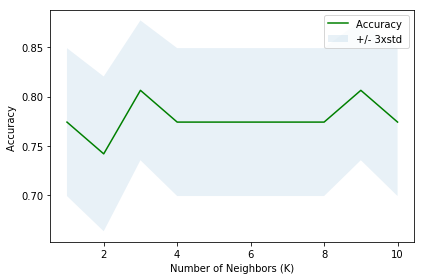

In [42]:
plt.figure()
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
#plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [43]:
# we run the kNN algorithm with k = 3 and print the confusion matrix

In [44]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [55]:
#predict the test set results and check the accuracy with each of our model:

In [56]:
Y_pred = classifier.predict(X_test)

In [57]:
#test the accuracy with a confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(Y_test, Y_pred)
print ('Classification report kNN')
print (classification_report(Y_test, Y_pred))


Classification report kNN
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.75      0.90      0.82        10
           2       0.90      0.69      0.78        13

   micro avg       0.81      0.81      0.81        31
   macro avg       0.81      0.82      0.81        31
weighted avg       0.82      0.81      0.80        31



In [59]:
#Naïve Bayes Algorithm

In [60]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cmnb = confusion_matrix(Y_test, Y_pred)
print ('Classification report Naive Bayes')
print (classification_report(Y_test, Y_pred))

Classification report Naive Bayes
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.83      1.00      0.91        10
           2       0.83      0.77      0.80        13

   micro avg       0.84      0.84      0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [61]:
#Decision Tree Algorithm

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cmdt = confusion_matrix(Y_test, Y_pred)
print ('Classification report Decision Tree') 
print (classification_report(Y_test, Y_pred))

Classification report Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.60      0.90      0.72        10
           2       0.89      0.62      0.73        13

   micro avg       0.77      0.77      0.77        31
   macro avg       0.83      0.80      0.79        31
weighted avg       0.82      0.77      0.78        31



In [63]:
#Random Forest Classification algorithm

In [64]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cmrf = confusion_matrix(Y_test, Y_pred)
print ('Classification report Random Forest')
print (classification_report(Y_test, Y_pred))

Classification report Random Forest
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.69      0.90      0.78        10
           2       0.89      0.62      0.73        13

   micro avg       0.77      0.77      0.77        31
   macro avg       0.79      0.80      0.78        31
weighted avg       0.80      0.77      0.77        31



In [65]:
# a visual inspection of the confusion matrixes gives relatively similar accuracy between the different methods
# in the precision and recall (false positive and negatives) -non normalized- that follows in the code below. In the code above,
#the harmonic average F1 of the precision and recall (normalized) will gives the overall estimation of the accuracy. 

#Make a function that plots the confusion matrix

In [66]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


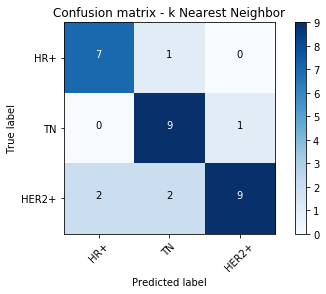

In [51]:
plot_confusion_matrix(cmknn, classes=['HR+','TN','HER2+'],normalize= False,  title='Confusion matrix - k Nearest Neighbor')
plt.savefig('cm_kNN.png')
